In [1]:
import spacy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import nltk
import re,string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

df = pd.read_csv("C:\\Users\\Admin\\Downloads\\twitter_data.csv")

print(df.shape)

df.head(5)

(24783, 7)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [2]:
nlp = spacy.load("en_core_web_lg",disable=["tagger"])

In [3]:
df["labels"] = df['class'].map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
df = df[["tweet", "labels"]]

In [4]:
df["labels"] = df['class'].map({0: "No Hate and Offensive Speech", 1: "Offensive Speech"})
df = df[["tweet", "labels"]]

KeyError: 'class'

In [4]:
def preprocess(text):
        text = str(text)
        test_list = text.split()
        text = ""
        for word in test_list:
            if word.endswith("ing"):
                word=word[:-3]
            text+=word
            text+=" "
        doc = nlp(text)
        filtered_tokens = []
        
        for token in doc:
            if token.is_stop or token.is_punct:
                continue
            filtered_tokens.append(token.lemma_)
            
        return " ".join(filtered_tokens)

In [5]:
df["tweet_new"] = df.tweet.apply(preprocess)

C:\Users\Admin\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [6]:
df.head()

,tweet,labels,tweet_new
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech,rt @mayasolovely woman complain clean house am...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech,rt @mleew17 boy dats cold tyga dwn bad cuffin ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech,rt @urkindofbrand dawg rt @80sbaby4life fuck b...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech,rt @c_g_anderson @viva_based look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech,rt @shenikaroberts shit hear true faker bitch ...


In [7]:
def clean(text):
    text = str (text). lower()
    text = re. sub('[.?]', '', text)
    text = re. sub('https?://\S+|www.\S+', '', text)
    text = re. sub('<.?>+', '', text)
    text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
    text = re. sub('\n', '', text)
    text = re. sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ". join(text)
    text = [stemmer. stem(word) for word in text. split(' ')]
    text=" ". join(text)
    return text

In [8]:
df["tweet_new"] = df.tweet_new.apply(clean)

In [9]:
df['vector'] = df['tweet_new'].apply(lambda text: nlp(text).vector)  

C:\Users\Admin\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [10]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['labels'].map({'No Hate and Offensive Speech' : 0, 'Offensive Speech': 1, 'Hate Speech':2})

#check the results with top 5 rows
df.head(5)

,tweet,labels,tweet_new,vector,label_num
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech,rt mayasolov woman complain clean hous amp man...,"[-0.57211995, 0.6595566, -1.6417766, -0.351363...",0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech,rt mlee boy dat cold tyga dwn bad cuffin dat h...,"[-0.36383075, -0.010934628, -0.44984773, 0.124...",1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech,rt urkindofbrand dawg rt babif fuck bitch star...,"[0.3710009, 0.51078933, -1.34232, 0.4083718, -...",1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech,rt cganderson vivabas look like tranni,"[-0.033501666, 0.59515333, -0.56129, -0.349748...",1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech,rt shenikarobert shit hear true faker bitch to...,"[0.6373105, -0.1933687, -0.120438054, -0.61097...",1


In [11]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['labels'].map({'No Hate and Offensive Speech' : 0, 'Offensive Speech': 1,})

#check the results with top 5 rows
df.head(5)

,tweet,labels,tweet_new,vector,label_num
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech,rt mayasolov woman complain clean hous amp man...,"[-0.57211995, 0.6595566, -1.6417766, -0.351363...",0.0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech,rt mlee boy dat cold tyga dwn bad cuffin dat h...,"[-0.36383075, -0.010934628, -0.44984773, 0.124...",1.0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech,rt urkindofbrand dawg rt babif fuck bitch star...,"[0.3710009, 0.51078933, -1.34232, 0.4083718, -...",1.0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech,rt cganderson vivabas look like tranni,"[-0.033501666, 0.59515333, -0.56129, -0.349748...",1.0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech,rt shenikarobert shit hear true faker bitch to...,"[0.6373105, -0.1933687, -0.120438054, -0.61097...",1.0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.vector.values, df.label_num, test_size=0.2, random_state=2022)

In [12]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

Accuracy: 0.7809158765382288
F1 Score: 0.6850537200227061
Precision: 0.7746567209234282
Recall: 0.7809158765382288
ROC AUC Score: 0.803174225927206
Confusion Matrix:
[[   1  817    0]
 [   0 3870    0]
 [   0  269    0]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


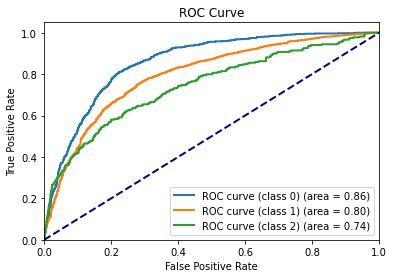

'# Enter your string for classification\ninput_string = "bye"\nresult = classify_text(input_string)\nprint(f"Predicted Label: {result}")'

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Predict labels for the test set
y_pred = clf.predict(scaled_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = clf.predict_proba(scaled_test_embed)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

def classify_text(input_text):
    preprocessed_text = preprocess(input_text)
    cleaned_text = clean(preprocessed_text)
    vector = nlp(cleaned_text).vector
    scaled_vector = scaler.transform([vector])
    prediction = clf.predict(scaled_vector)
    label_mapping = {0: 'No Hate and Offensive Speech', 1: 'Offensive Speech', 2: 'Hate Speech'}
    predicted_label = label_mapping.get(prediction[0], 'Unknown')
    return predicted_label

'''# Enter your string for classification
input_string = "bye"
result = classify_text(input_string)
print(f"Predicted Label: {result}")'''

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8624167843453702
F1 Score: 0.8467406473551681
Precision: 0.8454496474656557
Recall: 0.8624167843453702
ROC AUC Score: 0.9145867573827204
Confusion Matrix:
[[ 548  267    3]
 [ 149 3689   32]
 [  32  199   38]]


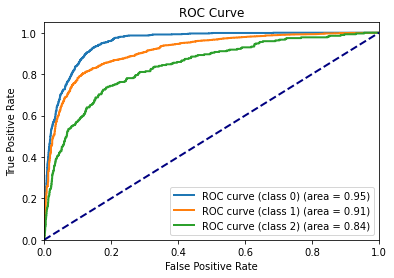

'# Enter your string for classification\ninput_string = "bye"\nresult = classify_text(input_string)\nprint(f"Predicted Label: {result}")'

In [14]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(scaled_train_embed,y_train)
y_pred = model1.predict(scaled_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model1.predict_proba(scaled_test_embed)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

def classify_text(input_text):
    preprocessed_text = preprocess(input_text)
    cleaned_text = clean(preprocessed_text)
    vector = nlp(cleaned_text).vector
    scaled_vector = scaler.transform([vector])
    prediction = model1.predict(scaled_vector)
    label_mapping = {0: 'No Hate and Offensive Speech', 1: 'Offensive Speech', 2: 'Hate Speech'}
    predicted_label = label_mapping.get(prediction[0], 'Unknown')
    return predicted_label

'''# Enter your string for classification
input_string = "bye"
result = classify_text(input_string)
print(f"Predicted Label: {result}")'''

Accuracy: 0.7222110147266492
F1 Score: 0.6771976575764322
Precision: 0.6415216529243252
Recall: 0.7222110147266492
ROC AUC Score: 0.516147045353619
Confusion Matrix:
[[  91  727    0]
 [ 378 3489    3]
 [  30  239    0]]


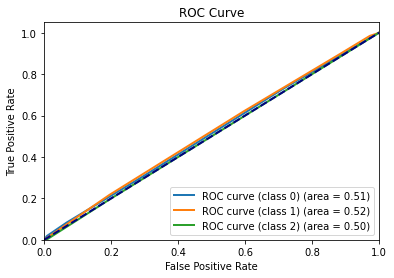

'# Enter your string for classification\ninput_string = "bye"\nresult = classify_text(input_string)\nprint(f"Predicted Label: {result}")'

In [15]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Predict labels for the test set
y_pred = clf.predict(scaled_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = clf.predict_proba(scaled_test_embed)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

def classify_text(input_text):
    preprocessed_text = preprocess(input_text)
    cleaned_text = clean(preprocessed_text)
    vector = nlp(cleaned_text).vector
    scaled_vector = scaler.transform([vector])
    prediction = clf.predict(scaled_vector)
    label_mapping = {0: 'No Hate and Offensive Speech', 1: 'Offensive Speech', 2: 'Hate Speech'}
    predicted_label = label_mapping.get(prediction[0], 'Unknown')
    return predicted_label

'''# Enter your string for classification
input_string = "bye"
result = classify_text(input_string)
print(f"Predicted Label: {result}")'''

Accuracy: 0.8664514827516643
F1 Score: 0.8415164307270223
Precision: 0.8508868445502065
Recall: 0.8664514827516643
ROC AUC Score: 0.9137639001137255
Confusion Matrix:
[[ 565  253    0]
 [ 142 3725    3]
 [  28  236    5]]


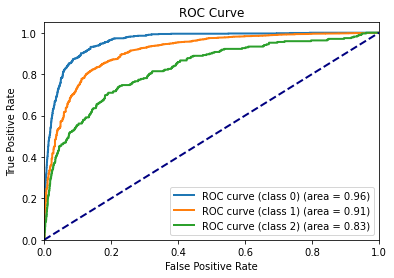

'# Enter your string for classification\ninput_string = "bye"\nresult = classify_text(input_string)\nprint(f"Predicted Label: {result}")'

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

svc = SVC(probability=True)
svc.fit(scaled_train_embed, y_train)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Predict labels for the test set
y_pred = svc.predict(scaled_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = svc.predict_proba(scaled_test_embed)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

def classify_text(input_text):
    preprocessed_text = preprocess(input_text)
    cleaned_text = clean(preprocessed_text)
    vector = nlp(cleaned_text).vector
    scaled_vector = scaler.transform([vector])
    prediction = svc.predict(scaled_vector)
    label_mapping = {0: 'No Hate and Offensive Speech', 1: 'Offensive Speech', 2: 'Hate Speech'}
    predicted_label = label_mapping.get(prediction[0], 'Unknown')
    return predicted_label

'''# Enter your string for classification
input_string = "bye"
result = classify_text(input_string)
print(f"Predicted Label: {result}")'''

Accuracy: 0.8315513415372201
F1 Score: 0.797229897000644
Precision: 0.809747350695337
Recall: 0.8315513415372201
ROC AUC Score: 0.8539076036692479
Confusion Matrix:
[[ 330  487    1]
 [  77 3778   15]
 [  11  244   14]]


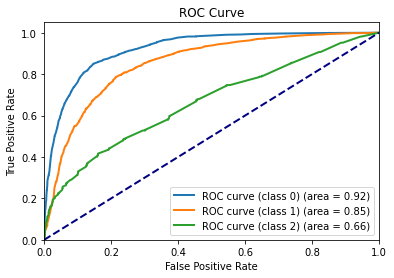

'# Enter your string for classification\ninput_string = "bye"\nresult = classify_text(input_string)\nprint(f"Predicted Label: {result}")'

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


model = RandomForestClassifier()
model.fit(scaled_train_embed, y_train)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Predict labels for the test set
y_pred = model.predict(scaled_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model.predict_proba(scaled_test_embed)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

def classify_text(input_text):
    preprocessed_text = preprocess(input_text)
    cleaned_text = clean(preprocessed_text)
    vector = nlp(cleaned_text).vector
    scaled_vector = scaler.transform([vector])
    prediction = model.predict(scaled_vector)
    label_mapping = {0: 'No Hate and Offensive Speech', 1: 'Offensive Speech', 2: 'Hate Speech'}
    predicted_label = label_mapping.get(prediction[0], 'Unknown')
    return predicted_label

'''# Enter your string for classification
input_string = "bye"
result = classify_text(input_string)
print(f"Predicted Label: {result}")'''

Accuracy: 0.7809158765382288
F1 Score: 0.6850537200227061
Precision: 0.7746567209234282
Recall: 0.7809158765382288
ROC AUC Score: 0.803174225927206
Confusion Matrix:
[[   1  817    0]
 [   0 3870    0]
 [   0  269    0]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


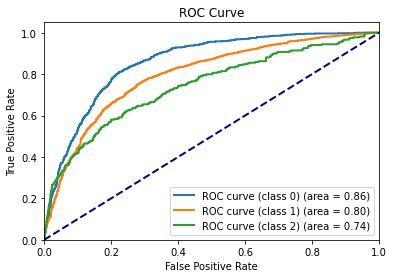

'# Enter your string for classification\ninput_string = "bye"\nresult = classify_text(input_string)\nprint(f"Predicted Label: {result}")'

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


model = MultinomialNB()
model.fit(scaled_train_embed, y_train)

# Predict labels for the test set
y_pred = model.predict(scaled_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model.predict_proba(scaled_test_embed)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

def classify_text(input_text):
    preprocessed_text = preprocess(input_text)
    cleaned_text = clean(preprocessed_text)
    vector = nlp(cleaned_text).vector
    scaled_vector = scaler.transform([vector])
    prediction = model.predict(scaled_vector)
    label_mapping = {0: 'No Hate and Offensive Speech', 1: 'Offensive Speech', 2: 'Hate Speech'}
    predicted_label = label_mapping.get(prediction[0], 'Unknown')
    return predicted_label

'''# Enter your string for classification
input_string = "bye"
result = classify_text(input_string)
print(f"Predicted Label: {result}")'''

Accuracy: 0.8297357272543877
F1 Score: 0.8106243660895969
Precision: 0.8025318827777438
Recall: 0.8297357272543877
ROC AUC Score: 0.8559072979749083
Confusion Matrix:
[[ 444  353   21]
 [ 191 3644   35]
 [  28  216   25]]


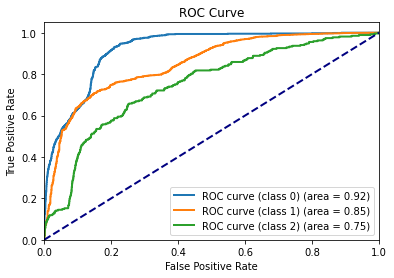

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize individual ensemble_models
dt_ensemble_model = DecisionTreeClassifier()
rf_ensemble_model = RandomForestClassifier()
svm_ensemble_model = SVC(kernel='linear', probability=True)  # Enable probability estimation for SVM

# Define the ensemble of ensemble_models
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt_ensemble_model),
    ('random_forest', rf_ensemble_model),
    ('svm', svm_ensemble_model)
], voting='soft')  # Use soft voting for probability averaging

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

# Training the ensemble ensemble_model
ensemble_model.fit(scaled_train_embed, y_train)

# Predict labels for the test set
y_pred = ensemble_model.predict(scaled_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = ensemble_model.predict_proba(scaled_test_embed)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Get input from the user
user_input = input("Enter the text you want to classify: ")

# Preprocess the user input
def classify_text(input_text):
    preprocessed_text = preprocess(input_text)
    cleaned_text = clean(preprocessed_text)
    vector = nlp(cleaned_text).vector
    scaled_vector = scaler.transform([vector])
    prediction = ensemble_model.predict(scaled_vector)
    label_mapping = {0: 'No Hate and Offensive Speech', 1: 'Offensive Speech', 2: 'Hate Speech'}
    predicted_label = label_mapping.get(prediction[0], 'Unknown')
    return predicted_label

# Enter your string for classification
input_string = "bye"
result = classify_text(input_string)